In [40]:
import sys
from pathlib import Path

sys.path.append(r"/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from data_analysis.data_fetcher.data_fetcher_class import DataFetcher
from data_collection.consts import  DB_PARAMS

In [41]:
fetcher = DataFetcher(DB_PARAMS)

Available regressors:
 - avg_default_verbolizer
 - avg_shrink_verbolizer
 - eps_surprise
 - f_size
 - full_list_default_verbolizer
 - full_list_shrink_verbolizer
 - hv_orig_score
 - lm_orig_score
 - max_abs_default
 - max_abs_shrink
 - max_default_verbolizer
 - max_shrink_verbolizer
 - md_hv1
 - md_hv2
 - md_hv3
 - md_lm1
 - md_lm2
 - md_lm3
 - min_default_verbolizer
 - min_shrink_verbolizer
 - stretch_default
 - stretch_shrink
Available sectors:
 - Technology (92)
 - Industrials (86)
 - Financial Services (85)
 - Healthcare (66)
 - Consumer Cyclical (58)
 - Consumer Defensive (40)
 - Real Estate (32)
 - Utilities (32)
 - Energy (30)
 - Basic Materials (23)
 - Communication Services (22)


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:117: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:90: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [42]:
df = fetcher.fetch_data(
    regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    
    ],
    prepare_fixed_effects=True,
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:149: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:196: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

In [43]:
df

hv_orig_score    md_hv1    md_hv2    md_hv3  lm_orig_score  \
company date                                                                 
A       2018.1       0.279352  0.407048  0.464492  0.136031      -0.426230   
        2018.2       0.285408  0.403947  0.467993  0.117939      -0.446313   
        2018.3       0.289823  0.405405  0.471069  0.112204      -0.427828   
        2018.4       0.429108  0.421430  0.456895  0.122056      -0.445096   
        2019.1       0.298844  0.418634  0.451665  0.130996      -0.488801   
...                       ...       ...       ...       ...            ...   
ZTS     2023.4       0.491838  0.406555  0.400253  0.076464      -0.527094   
        2024.1       0.449668  0.384482  0.454986  0.167082      -0.541446   
        2024.2       0.470535  0.401596  0.388755  0.079127      -0.588889   
        2024.3       0.481255  0.397674  0.392373  0.067059      -0.619632   
        2024.4       0.473916  0.407789  0.388727  0.072717      -0.602434   

                  md_lm1    md_lm2    md_lm3  two_day_r  three_day_r  ...  \
company date                                                          ...   
A       2018.1 -0.037076 -0.483003 -0.679878   1.025825     0.483022  ...   
        2018.2 -0.055378 -0.468404 -0.691983   0.589360     1.279579  ...   
        2018.3 -0.061395 -0.474984 -0.678977  -0.429375    -0.088836  ...   
        2018.4  0.049495 -0.452404 -0.631373   1.777532     1.680097  ...   
        2019.1 -0.033618 -0.461935 -0.621777  -0.488889     0.232804  ...   
...                  ...       ...       ...        ...          ...  ...   
ZTS     2023.4 -0.057252 -0.306899 -0.557082   1.519448     1.775257  ...   
        2024.1  0.004641 -0.395766 -0.589001   1.170687     0.764161  ...   
        2024.2 -0.025397 -0.314763 -0.537155   0.413028    -0.428944  ...   
        2024.3 -0.052765 -0.328767 -0.522260   0.129891    -0.173188  ...   
        2024.4 -0.050720 -0.327259 -0.527242  -0.290980     0.019646  ...   

                seven_day_abn_r  full_q_abn_r  two_day_r_vol  three_day_r_vol  \
company date                                                                    
A       2018.1         0.470640     -0.205586       0.152572         0.106735   
        2018.2         0.553269      0.083169       0.102017         0.095403   
        2018.3        -0.108746     -0.156779       0.026623         0.038351   
        2018.4        -0.171608      0.224290       0.094542         0.086733   
        2019.1        -0.065195     -0.347735       0.131182         0.096568   
...                         ...           ...            ...              ...   
ZTS     2023.4         0.807901      0.032039       0.208676         0.223903   
        2024.1         0.945414     -0.113666       0.253572         0.230213   
        2024.2         0.305785      0.041010       0.151240         0.145689   
        2024.3        -0.226965     -0.191211       0.327859         0.217504   
        2024.4        -0.188048           NaN       0.422700         0.378159   

                four_day_r_vol  five_day_r_vol  six_day_r_vol  \
company date                                                    
A       2018.1        0.097388        0.091725       0.090142   
        2018.2        0.092651        0.094497       0.087725   
        2018.3        0.038646        0.040956       0.039058   
        2018.4        0.114344        0.132806       0.126651   
        2019.1        0.088686        0.088205       0.084073   
...                        ...             ...            ...   
ZTS     2023.4        0.207268        0.195246       0.169644   
        2024.1        0.165258        0.153133       0.146375   
        2024.2        0.156204        0.169648       0.145476   
        2024.3        0.198820        0.185771       0.179514   
        2024.4        0.274052        0.253874       0.240146   

                seven_day_r_vol  full_q_r_vol  filing_rank  
company date                          

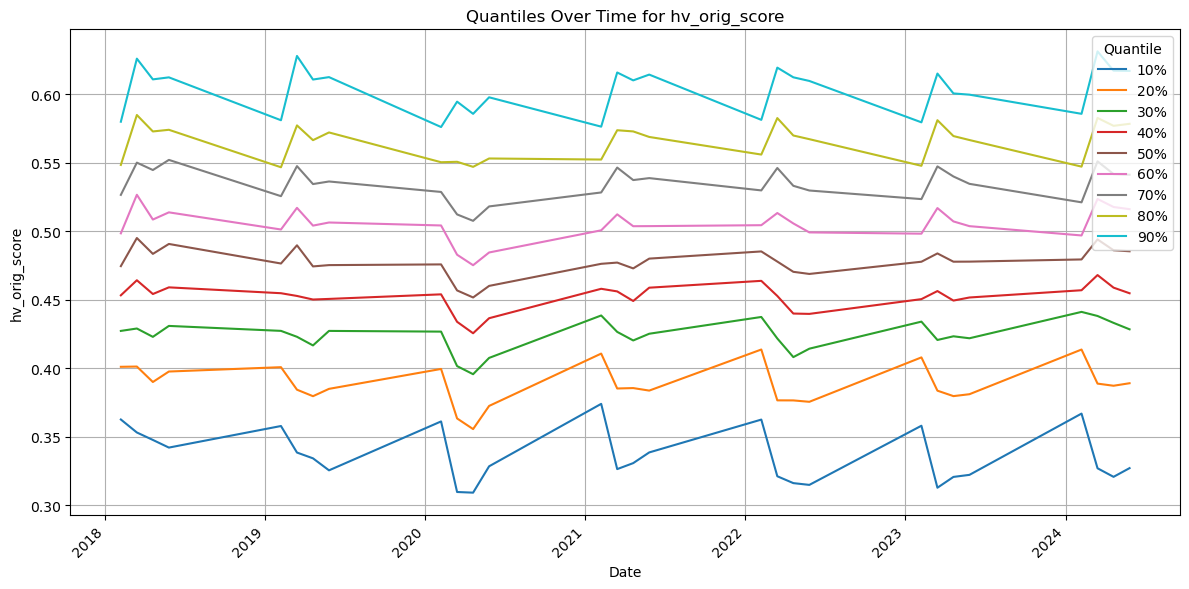

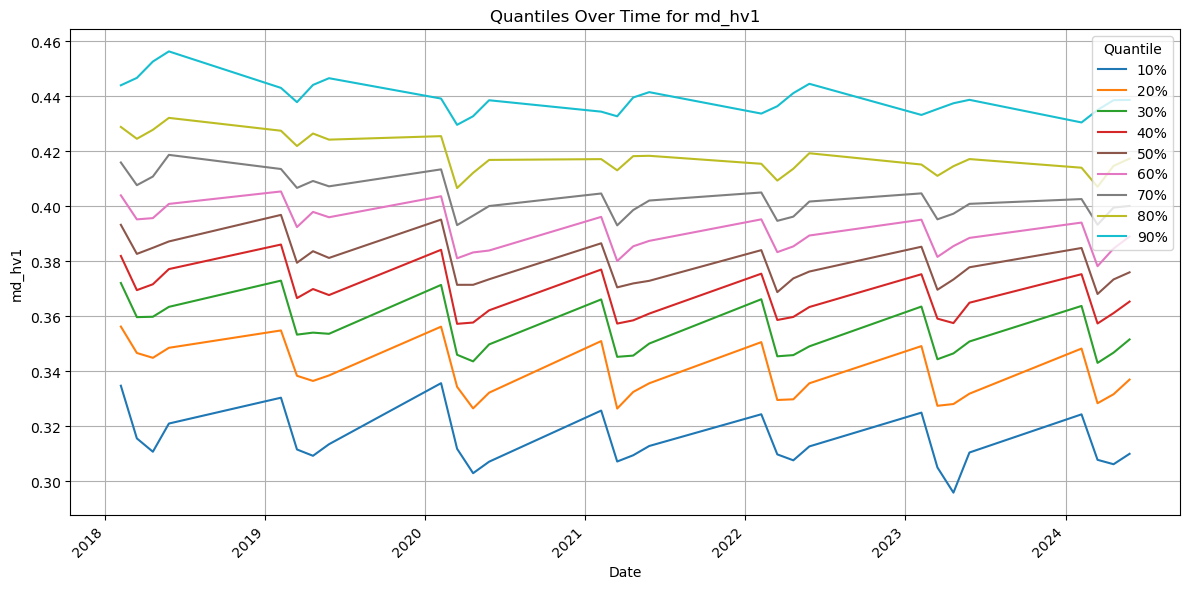

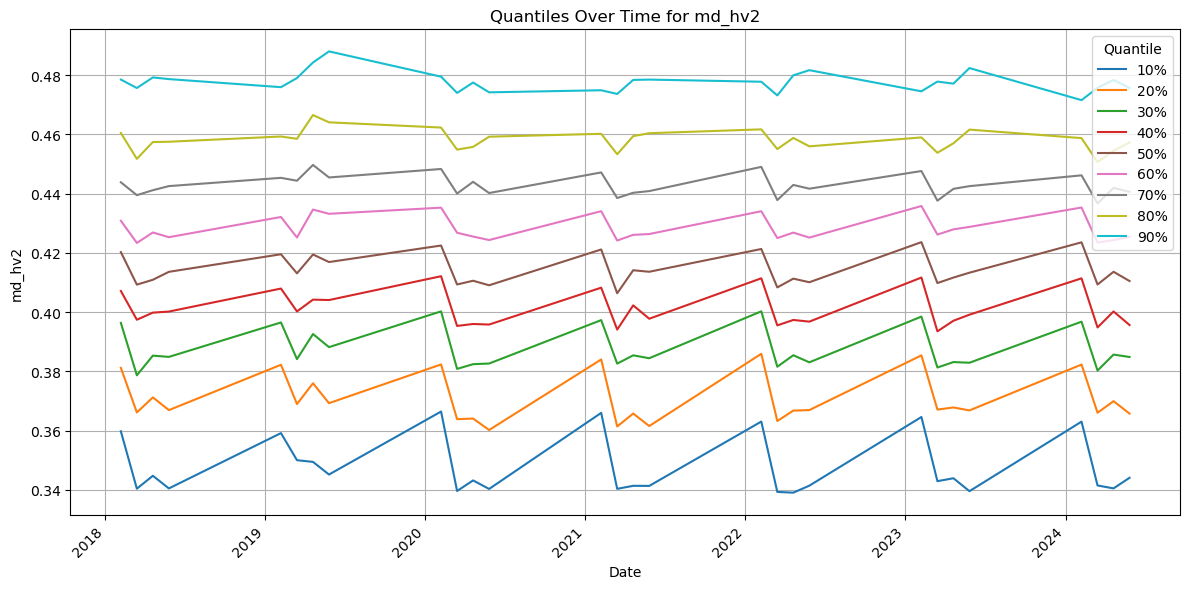

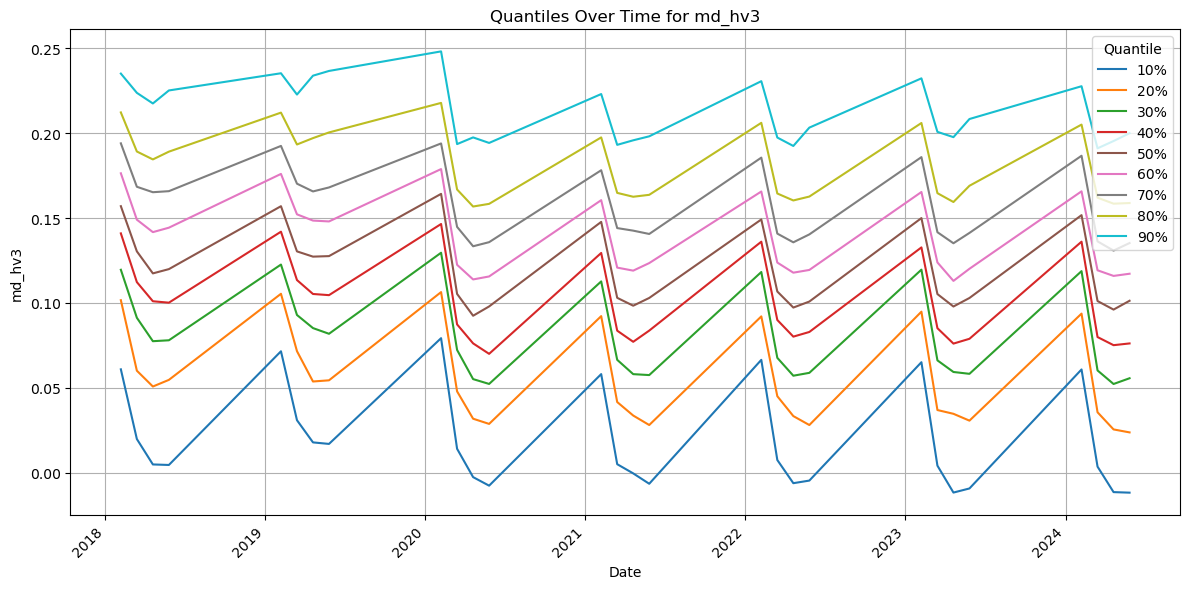

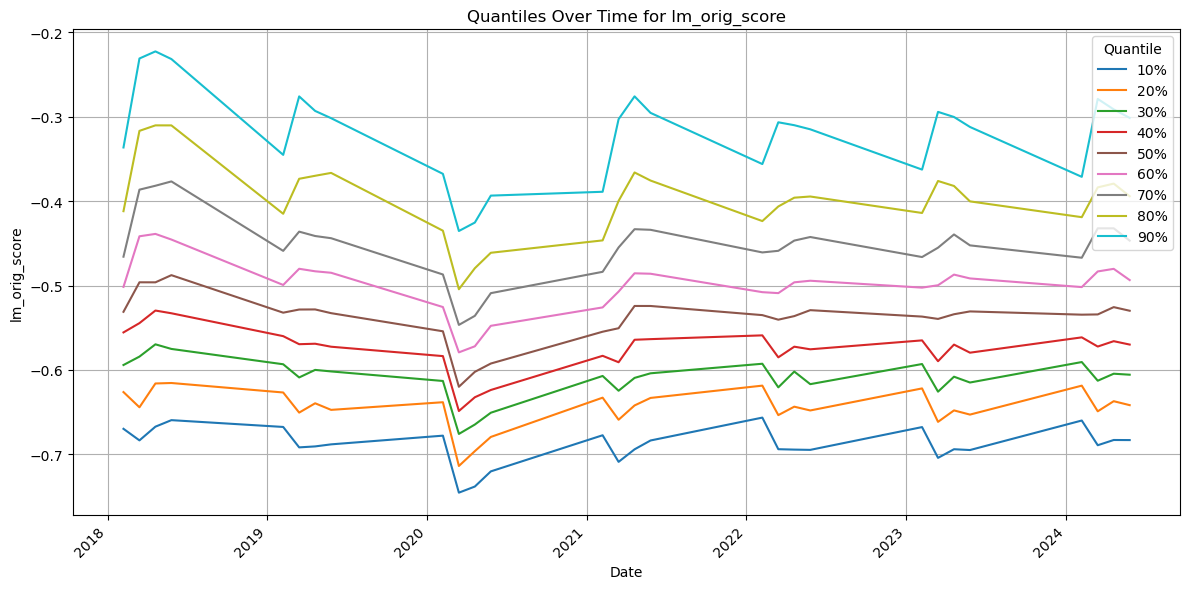

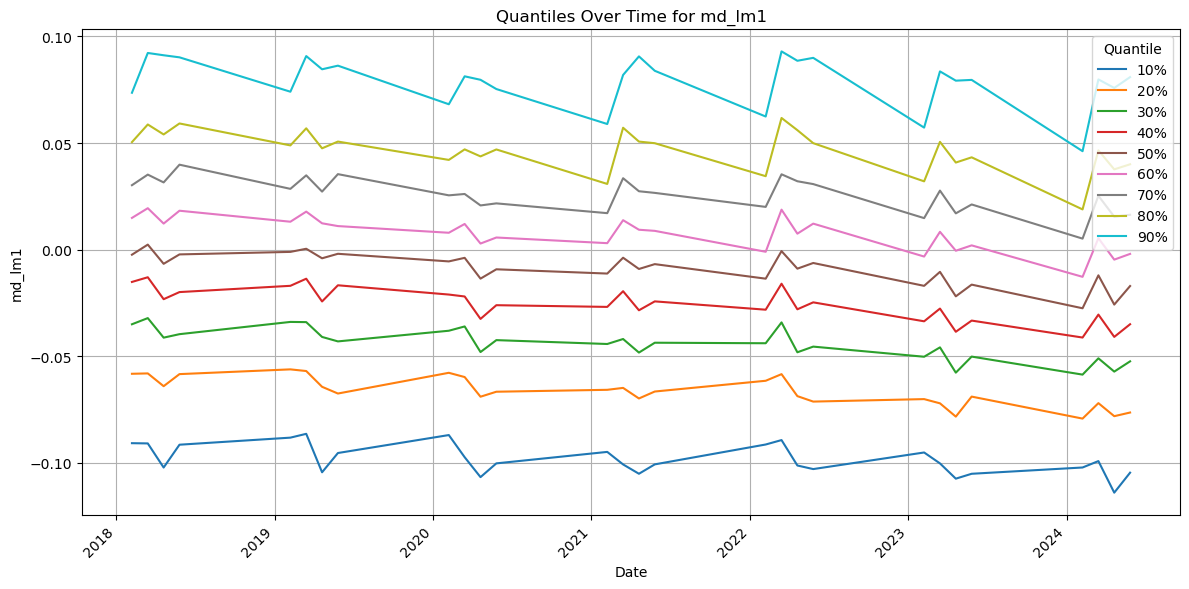

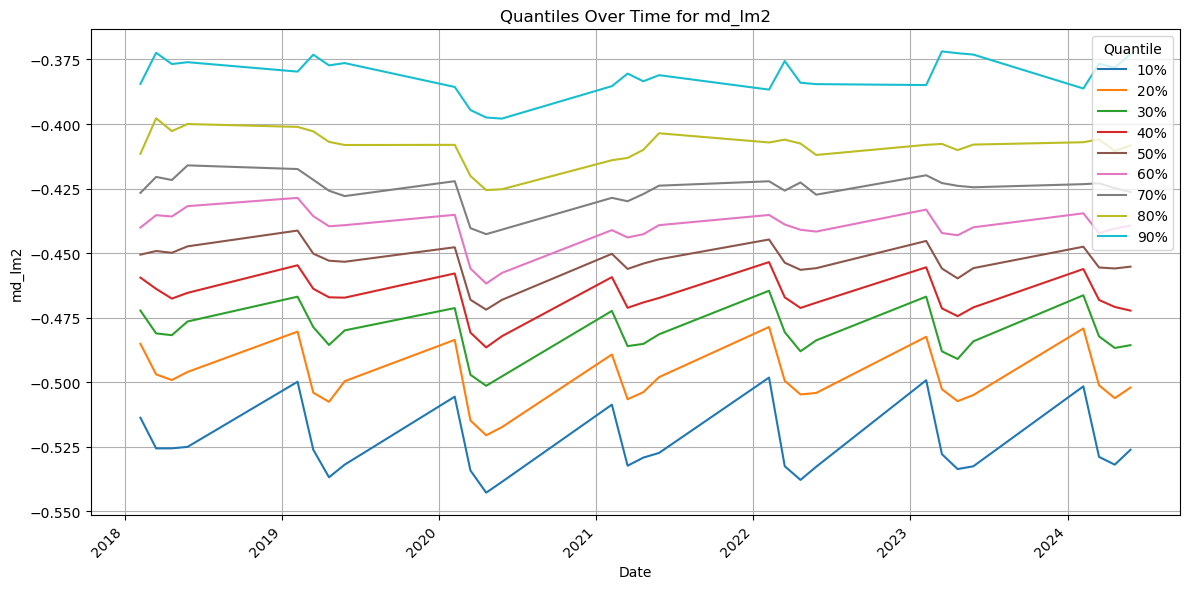

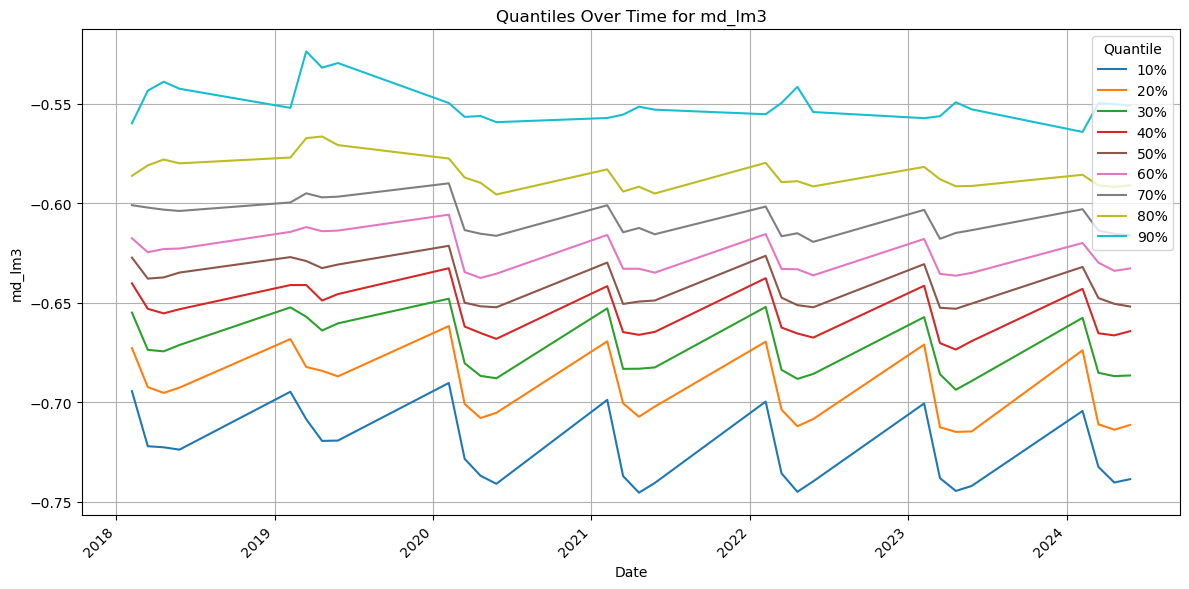

In [44]:
cols=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3'
    ]
quantile_levels = np.linspace(0.1, 0.9, 9)

# Reset index to make 'date' a column
df_reset = df.reset_index()

# For each column: compute quantiles across companies for each date
for col in cols:
    # Pivot: rows = date, columns = company, values = col
    data = df_reset.pivot(index='date', columns='company', values=col)

    # Compute quantiles row-wise (across companies)
    quantiles_df = pd.DataFrame(
        [data.quantile(q, axis=1) for q in quantile_levels],
        index=[f'{int(q*100)}%' for q in quantile_levels]
    ).T  # shape: (n_dates × 9)

    # Plot
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, 9))

    for i, q_label in enumerate(quantiles_df.columns):
        plt.plot(
            quantiles_df.index, 
            quantiles_df[q_label], 
            label=q_label, 
            color=colors[i]
        )

    plt.title(f'Quantiles Over Time for {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend(title='Quantile', loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [45]:
sec_dict = {}

for sec in fetcher.sectors.keys():
    df = fetcher.fetch_data(
  regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3'
    ],
   company_filters={'sector': sec},
   prepare_fixed_effects=True
)
    sec_dict[sec] = df

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:149: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:196: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

In [46]:
regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3'
    ]

reg_dict = {}

for reg in regressors:

    sec_dict_avgs = {}
    for sec in sec_dict.keys():
        sec_dict_avgs[sec] = sec_dict[sec][reg].mean()
    
    reg_dict[reg] = sec_dict_avgs

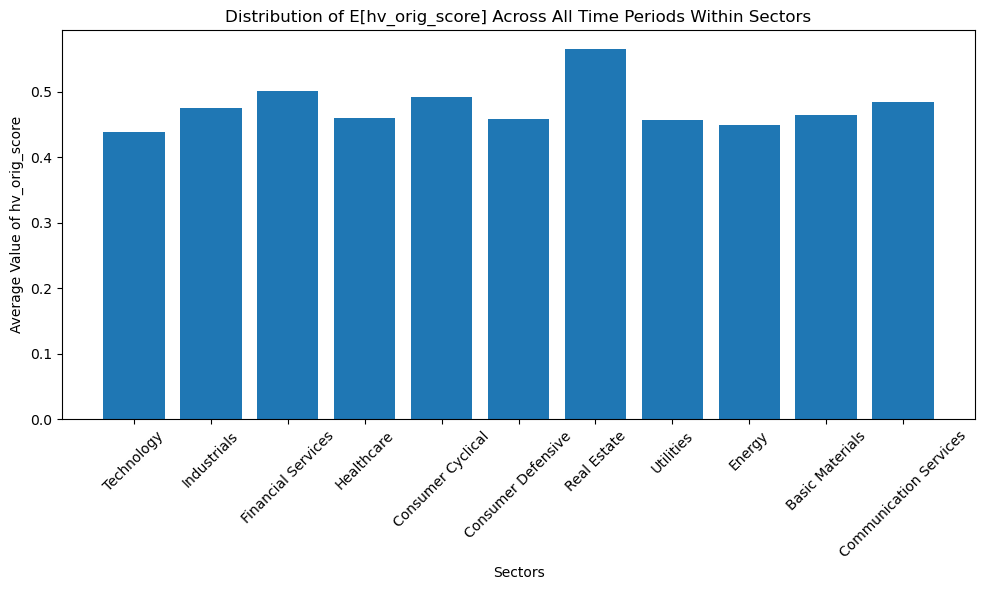

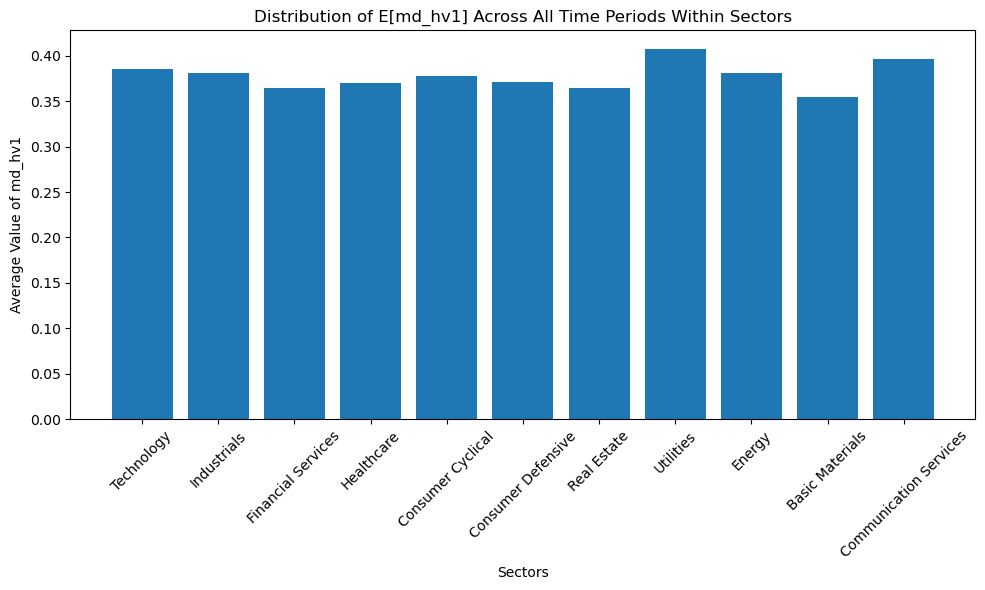

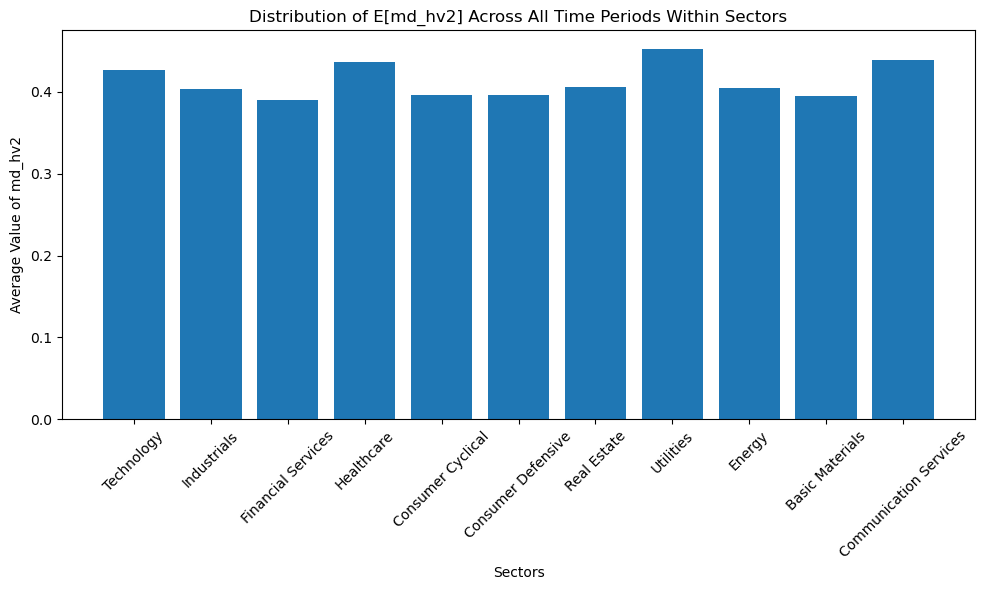

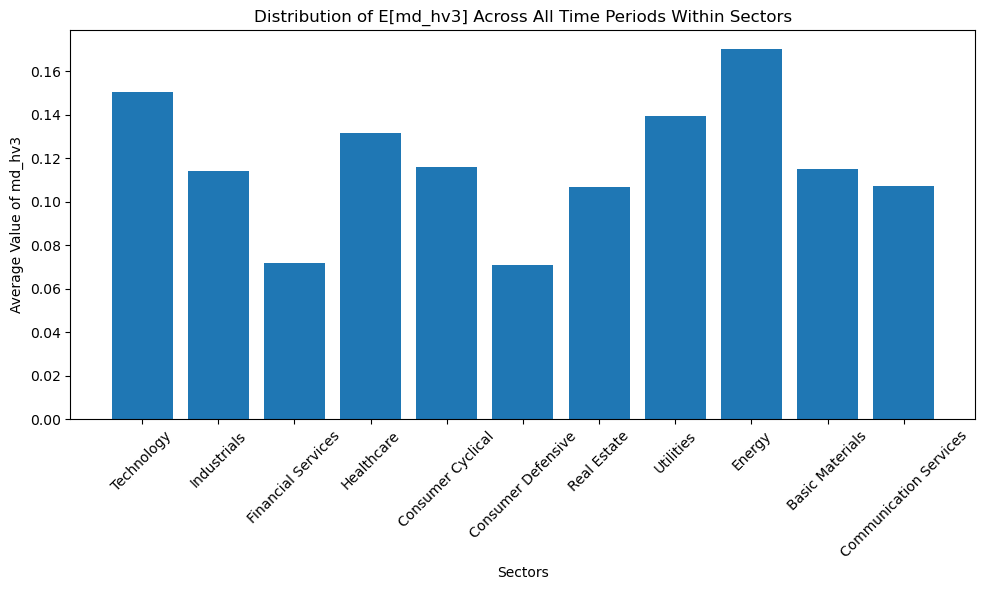

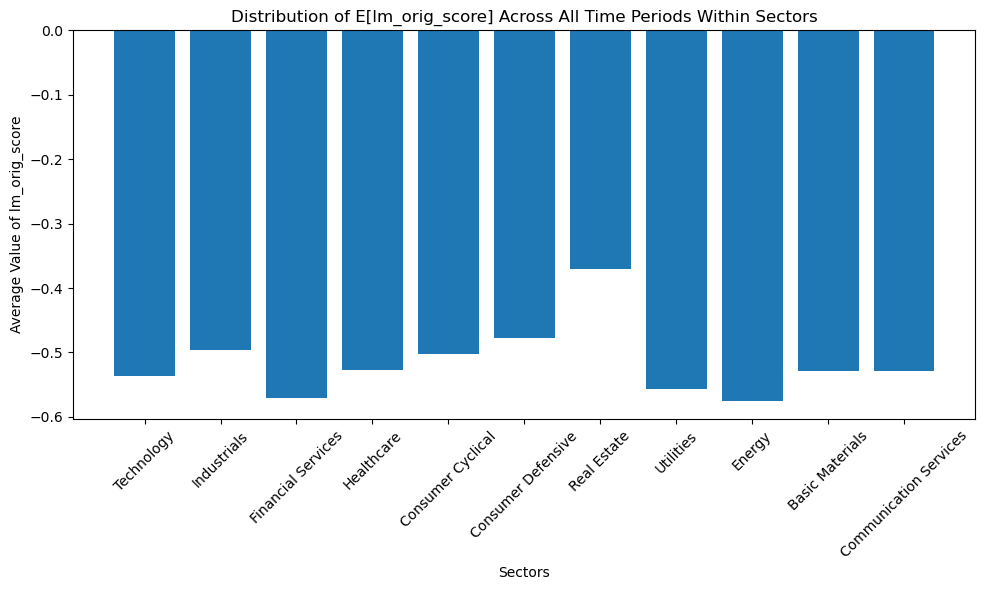

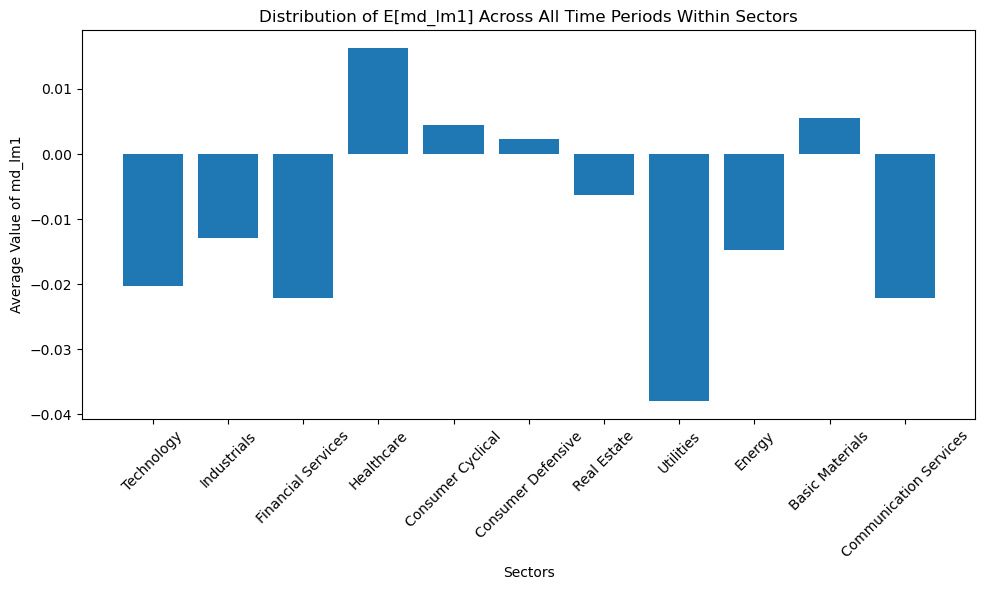

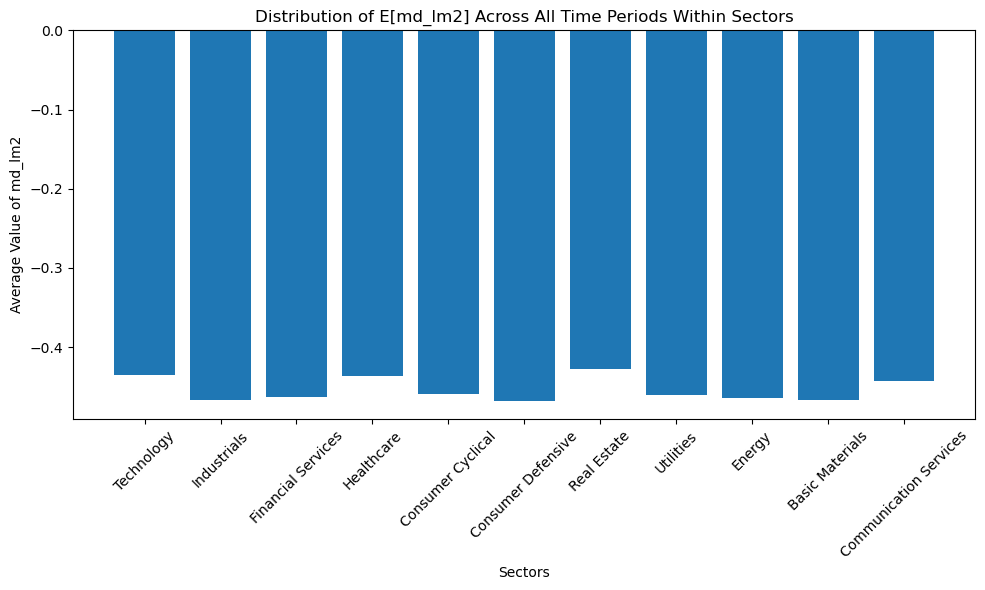

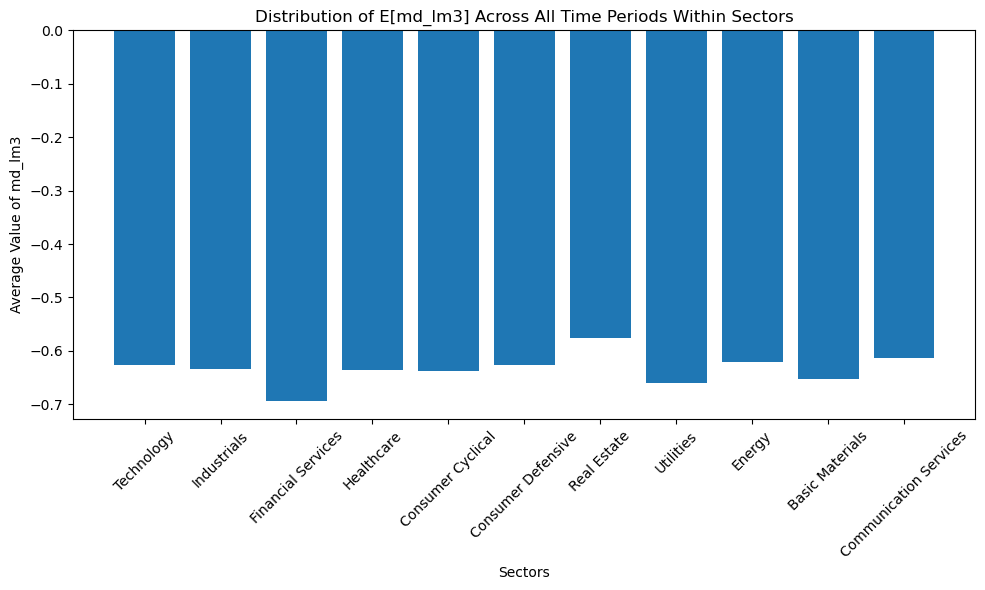

In [47]:
for reg in reg_dict:

    sec_dict_avg = reg_dict[reg]

    keys = list(sec_dict_avg.keys())
    values = list(sec_dict_avg.values())

    plt.figure(figsize=(10, 6))
    plt.bar(keys, values)
    
    # Labeling
    plt.xlabel('Sectors')
    plt.ylabel(f'Average Value of {reg}')
    plt.title(f'Distribution of E[{reg}] Across All Time Periods Within Sectors')
    plt.xticks(
        rotation=45,
        fontsize=10
    )   
    plt.tight_layout()
    plt.show()

In [48]:
regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    'avg_default_verbolizer', 
       'avg_shrink_verbolizer',
       'max_abs_default',
       'max_abs_shrink',
        'max_default_verbolizer',
        'max_shrink_verbolizer',
        'min_default_verbolizer',
        'min_shrink_verbolizer',
        'eps_surprise',
        'f_size',
    ]

df1 = fetcher.fetch_data(
    regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    'avg_default_verbolizer', 
       'avg_shrink_verbolizer',
       'max_abs_default',
       'max_abs_shrink',
        'max_default_verbolizer',
        'max_shrink_verbolizer',
        'min_default_verbolizer',
        'min_shrink_verbolizer',
        'eps_surprise',
        'f_size',
    ],

    prepare_fixed_effects=True,
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:149: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:196: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

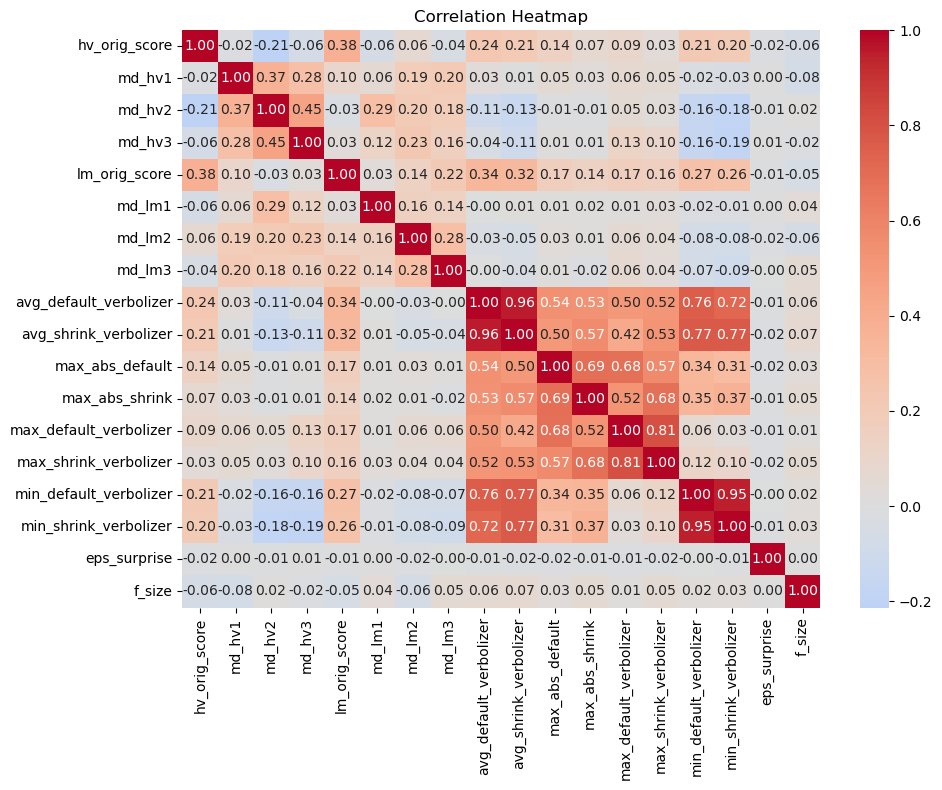

In [50]:
df_subset = df1[regressors]

corr = df_subset.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
